# Numerical Derivatives

The numerical derivatives like
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}~.
$$

Are evaluated using finite differences

The simplest methods are

## Forward difference
$$
f'(x) \simeq \frac{f(x+h) - f(x)}{h}~.
$$

The truncation error can be estimated through the Taylor theorem
$$
R_{\rm forw} = -\frac{1}{2}h f''(x) + \mathcal{O}(h^2)
$$

## Backward difference
$$
f'(x) \simeq \frac{f(x) - f(x-h)}{h}~.
$$

The truncation error:
$$
R_{\rm back} = \frac{1}{2}h f''(x) + \mathcal{O}(h^2)
$$

## Central difference

Take the average of forward and backward differences to cancel out the $\mathcal{O}(h)$ term in the error estimate:

$$
f'(x) \simeq \frac{f(x+h) - f(x-h)}{2h}~.
$$

The truncation error:
$$
R_{\rm cent} = -\frac{1}{6}h^2 f'''(x) + \mathcal{O}(h^3)
$$

In [ ]:
def df_forward(f,x,h):
    return (f(x+h) - f(x)) / h

def df_backward(f,x,h):
    return (f(x) - f(x-h)) / h

def df_central(f,x,h):
    return (f(x+h) - f(x-h)) / (2. * h)

In [ ]:
import numpy as np

# def f(x):
#     return x*(x-1.)*(x-2.)*(x-3.)*(x-4.)
#     #return 1./(1+25.*x**2)

# def df(x):
#     return (x-1.)*(x-2.)*(x-3.)*(x-4.) + x*(x-2.)*(x-3)*(x-4.) + x*(x-1.)*(x-3)*(x-4.) + x*(x-1.)*(x-2.)*(x-4.) + x*(x-1.)*(x-2.)*(x-3.)
#     #return -50.*x/(1+25.*x**2)**2
    
def f(x):
    return np.exp(x)

def df(x):
    return np.exp(x)

def d2f(x):
    return np.exp(x)

def d3f(x):
    return np.exp(x)

def d4f(x):
    return np.exp(x)

def d5f(x):
    return np.exp(x)

In [ ]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))
x0 = 0.

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_forward(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(0.5*h*d2f(x0)/df(x0))
    arr_err_theo.append(df_err_theo)
    
arr_df_forw = arr_df[:]
arr_err_forw = arr_err[:]
arr_err_theo_forw = arr_err_theo[:]

In [ ]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_backward(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(0.5*h*d2f(x0)/df(x0))
    arr_err_theo.append(df_err_theo)
    
arr_df_back = arr_df[:]
arr_err_back = arr_err[:]
arr_err_theo_back = arr_err_theo[:]

In [ ]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_central(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(h**2 * d3f(x0)/df(x0)/6.)
    arr_err_theo.append(df_err_theo)

arr_df_cent = arr_df[:]
arr_err_cent = arr_err[:]
arr_err_theo_cent = arr_err_theo[:]

To improve the approximation error use more than two function evaluations, e.g.
$$
f'(x) \simeq \frac{A f(x+2h) + B f(x+h) + C f(x) + D f(x-h) + E f(x-2h)}{h} + \mathcal{O}(h^4)
$$

Determine $A,B,C,D,E$ from from Taylor expansion of $f(x)$:
$$
f'(x) \simeq \frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h} + \frac{h^4}{30} f^{(5)} (x)
$$

In [ ]:
def df_central2(f,x,h):
    return (-f(x+2.*h) + 8. * f(x+h) - 8. * f(x-h) + f(x - 2.*h)) / (12. * h)

In [ ]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_central2(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(h**4 * d5f(x0)/df(x0)/30.)
    arr_err_theo.append(df_err_theo)
    
arr_df_cent2 = arr_df[:]
arr_err_cent2 = arr_err[:]
arr_err_theo_cent2 = arr_err_theo[:]

In [ ]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.title("Accuracy of the numerical derivative")
plt.xlabel("${h}$", fontsize=18)
plt.ylabel("relative error", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-13,1.)
plt.scatter(arr_h, arr_err_forw, color="red",label="Forward diff. ${O(h)}$")
plt.plot(arr_h, arr_err_theo_forw, color="red")
plt.scatter(arr_h, arr_err_back, color="blue",label="Backward diff. ${O(h)}$")
plt.plot(arr_h, arr_err_theo_back, color="blue")
plt.scatter(arr_h, arr_err_cent, color="orange",label="Central diff. ${O(h^2)}$")
plt.plot(arr_h, arr_err_theo_cent, color="orange")
plt.scatter(arr_h, arr_err_cent2, color="purple",label="Central diff. ${O(h^4)}$")
plt.plot(arr_h, arr_err_theo_cent2, color="purple")

plt.legend()
plt.show()

## High-order derivatives

Central difference for the 2nd derivative
$$
f''(x) \simeq \frac{f'(x+h/2) - f'(x-h/2)}{h}
$$

Apply the central difference again to $f'(x+h/2)$ and $f'(x-h/2)$:
$$
f''(x) \simeq \frac{f(x+h) - 2f(x) - f(x-h)}{h^2}
$$

The truncation error:
$$
R_{f''_{\rm cent}(x)} = -\frac{1}{12} h^2 f^{(4)}(x)
$$

In [9]:
def d2f_central(f,x,h):
    return (f(x+h) - 2*f(x) + f(x-h)) / (h**2)

In [10]:
print("{:<10} {:<20} {:<20}".format('h',"f''(0)","Relative error"))

arr_h = []
arr_d2f = []
arr_err = []

for i in range(0,-20,-1):
    h = 10**i
    d2f_val = d2f_central(f, x0,h)
    d2f_err = abs((d2f_val - d2f(x0)) / d2f(x0))
    print("{:<10} {:<20} {:<20}".format(h,d2f_val,d2f_err))
    arr_h.append(h)
    arr_d2f.append(d2f_val)
    arr_err.append(d2f_err)

arr_d2f_cent = arr_df[:]
arr_errd2f_cent = arr_err[:]

h          f''(0)               Relative error      
1          1.0861612696304874   0.08616126963048742 
0.1        1.0008336111607228   0.0008336111607227803
0.01       1.000008333360558    8.333360558054892e-06
0.001      1.0000000834065048   8.340650481386547e-08
0.0001     1.0000000050247593   5.024759275329416e-09
1e-05      0.9999989725173463   1.0274826537370885e-06
1e-06      0.9999778782798785   2.212172012150404e-05
1e-07      0.999200722162641    0.0007992778373590026
1e-08      0.0                  1.0                 
1e-09      111.02230246251564   110.02230246251564  
1e-10      0.0                  1.0                 
1e-11      0.0                  1.0                 
1e-12      111022302.46251567   111022301.46251567  
1e-13      -11102230246.251564  11102230247.251564  
1e-14      0.0                  1.0                 
1e-15      111022302462515.64   111022302462514.64  
1e-16      -1.1102230246251566e+16 1.1102230246251568e+16
1e-17      0.0                  1

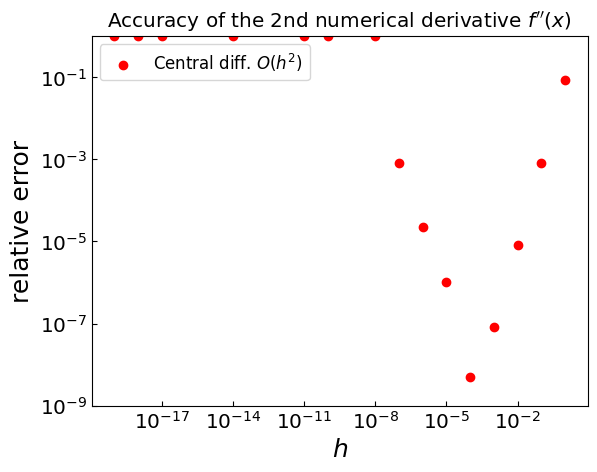

In [11]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.title("Accuracy of the 2nd numerical derivative ${f''(x)}$")
plt.xlabel("${h}$", fontsize=18)
plt.ylabel("relative error", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-9,1.)
plt.scatter(arr_h, arr_errd2f_cent, color="red",label="Central diff. ${O(h^2)}$")

plt.legend()
plt.show()